In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_gaussian_quantiles

X1,y1 = make_gaussian_quantiles(cov=3,n_samples=1000,n_features=2,n_classes=2,random_state=1)
X1 = pd.DataFrame(X1,columns=['x','y'])
y1 = pd.Series(y1)

X2,y2 = make_gaussian_quantiles(mean=(4,4),cov=1,n_samples=500,n_features=2,n_classes=2,random_state=1)
X2 = pd.DataFrame(X1,columns=['x','y'])
y2 = pd.Series(y2)

X1.shape
X2.shape
ds = pd.DataFrame(np.concatenate((X1,X2)))
y = pd.Series(np.concatenate((y1, -y2+1)))

In [ ]:
ds['y'] = y

In [ ]:
ds['y'].value_counts()

,count
y,
0.0,750
1.0,750


In [ ]:
ds = ds.sample(1500)[0:1000]

In [ ]:
import matplotlib.pyplot as plt

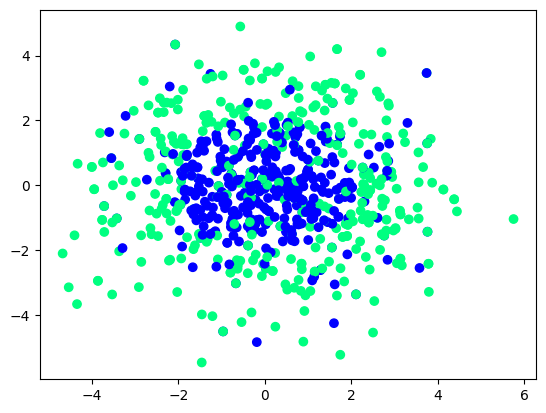

In [ ]:
plt.scatter(ds.iloc[:,0],ds.iloc[:,1],c=ds.iloc[:,-1],cmap='winter')

In [ ]:
ds['pre1'] = np.log(494/506)

In [ ]:
np.log(494/506)

-0.024001152099543014

In [ ]:
ds

,0,1,y,pre1
1974,3.697152,-0.046704,NaN,-0.024001
1582,-1.294116,2.931417,NaN,-0.024001
1075,-2.336011,2.256058,1.0,-0.024001
1528,0.525833,-1.387004,NaN,-0.024001
575,-1.113490,1.446364,0.0,-0.024001
...,...,...,...,...
111,-0.628063,-2.572366,1.0,-0.024001
580,-1.083124,-1.028566,0.0,-0.024001
1407,-1.795541,0.944362,0.0,-0.024001
1265,1.619723,3.139390,1.0,-0.024001


In [ ]:
p = np.exp(-0.24001)/(1+np.exp(-0.024001))

In [ ]:
p

0.3980296874757724

In [ ]:
ds['pre1'] = 0.5

In [ ]:
ds

,0,1,y,pre1
1974,3.697152,-0.046704,NaN,0.5
1582,-1.294116,2.931417,NaN,0.5
1075,-2.336011,2.256058,1.0,0.5
1528,0.525833,-1.387004,NaN,0.5
575,-1.113490,1.446364,0.0,0.5
...,...,...,...,...
111,-0.628063,-2.572366,1.0,0.5
580,-1.083124,-1.028566,0.0,0.5
1407,-1.795541,0.944362,0.0,0.5
1265,1.619723,3.139390,1.0,0.5


In [ ]:
ds['res1'] = ds['y'] - ds['pre1']

In [ ]:
ds

,0,1,y,pre1,res1
1974,3.697152,-0.046704,NaN,0.5,NaN
1582,-1.294116,2.931417,NaN,0.5,NaN
1075,-2.336011,2.256058,1.0,0.5,0.5
1528,0.525833,-1.387004,NaN,0.5,NaN
575,-1.113490,1.446364,0.0,0.5,-0.5
...,...,...,...,...,...
111,-0.628063,-2.572366,1.0,0.5,0.5
580,-1.083124,-1.028566,0.0,0.5,-0.5
1407,-1.795541,0.944362,0.0,0.5,-0.5
1265,1.619723,3.139390,1.0,0.5,0.5


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=4)

In [ ]:
if ds.iloc[:, -1].isnull().any():
    ds = ds.dropna(subset=[ds.columns[-1]])

tree1 = DecisionTreeRegressor(max_leaf_nodes=4)
tree1.fit(ds.iloc[:, 0:2], ds.iloc[:, -1])

DecisionTreeRegressor(max_leaf_nodes=4)

[Text(0.6666666666666666, 0.875, 'x[1] <= 1.932\nsquared_error = 0.25\nsamples = 757\nvalue = 0.015'),
 Text(0.5, 0.625, 'x[0] <= 2.03\nsquared_error = 0.249\nsamples = 663\nvalue = -0.038'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[0] <= -1.865\nsquared_error = 0.239\nsamples = 563\nvalue = -0.104'),
 Text(0.16666666666666666, 0.125, 'squared_error = 0.147\nsamples = 95\nvalue = 0.321'),
 Text(0.5, 0.125, 'squared_error = 0.214\nsamples = 468\nvalue = -0.19'),
 Text(0.6666666666666666, 0.375, 'squared_error = 0.141\nsamples = 100\nvalue = 0.33'),
 Text(0.8333333333333334, 0.625, 'squared_error = 0.095\nsamples = 94\nvalue = 0.394'),
 Text(0.75, 0.75, '  False')]

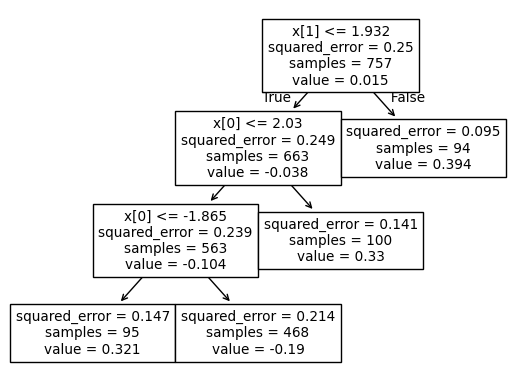

In [ ]:
from sklearn.tree import plot_tree
plot_tree(tree1)

In [ ]:
ds['leaf_index1'] = tree1.apply(ds.iloc[:,0:2])

<ipython-input-47-8be1e800048e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['leaf_index1'] = tree1.apply(ds.iloc[:,0:2])


In [ ]:
ds

,0,1,y,pre1,res1,leaf_index1
1075,-2.336011,2.256058,1.0,0.5,0.5,2
575,-1.113490,1.446364,0.0,0.5,-0.5,6
8,-0.038728,-2.425685,1.0,0.5,0.5,6
151,-2.232839,0.190150,1.0,0.5,0.5,5
359,3.055831,-2.403182,1.0,0.5,0.5,4
...,...,...,...,...,...,...
111,-0.628063,-2.572366,1.0,0.5,0.5,6
580,-1.083124,-1.028566,0.0,0.5,-0.5,6
1407,-1.795541,0.944362,0.0,0.5,-0.5,6
1265,1.619723,3.139390,1.0,0.5,0.5,2


In [ ]:
ds['leaf_index1'].value_counts()

,count
leaf_index1,
6,468
4,100
5,95
2,94


In [ ]:
tree1.tree_.node_count

7

In [ ]:
from sklearn.tree import plot_tree

[Text(0.6666666666666666, 0.875, 'x[1] <= 1.932\nsquared_error = 0.25\nsamples = 757\nvalue = 0.015'),
 Text(0.5, 0.625, 'x[0] <= 2.03\nsquared_error = 0.249\nsamples = 663\nvalue = -0.038'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[0] <= -1.865\nsquared_error = 0.239\nsamples = 563\nvalue = -0.104'),
 Text(0.16666666666666666, 0.125, 'squared_error = 0.147\nsamples = 95\nvalue = 0.321'),
 Text(0.5, 0.125, 'squared_error = 0.214\nsamples = 468\nvalue = -0.19'),
 Text(0.6666666666666666, 0.375, 'squared_error = 0.141\nsamples = 100\nvalue = 0.33'),
 Text(0.8333333333333334, 0.625, 'squared_error = 0.095\nsamples = 94\nvalue = 0.394'),
 Text(0.75, 0.75, '  False')]

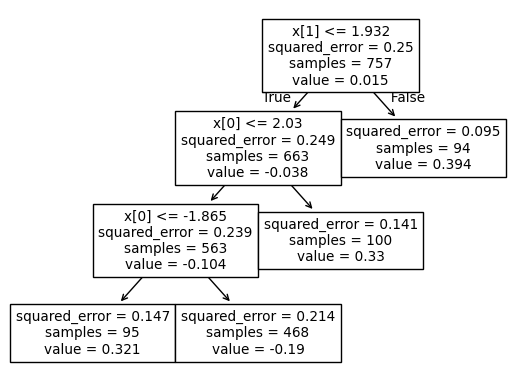

In [ ]:
plot_tree(tree1)

In [ ]:
ds

,0,1,y,pre1,res1,leaf_index1
1075,-2.336011,2.256058,1.0,0.5,0.5,2
575,-1.113490,1.446364,0.0,0.5,-0.5,6
8,-0.038728,-2.425685,1.0,0.5,0.5,6
151,-2.232839,0.190150,1.0,0.5,0.5,5
359,3.055831,-2.403182,1.0,0.5,0.5,4
...,...,...,...,...,...,...
111,-0.628063,-2.572366,1.0,0.5,0.5,6
580,-1.083124,-1.028566,0.0,0.5,-0.5,6
1407,-1.795541,0.944362,0.0,0.5,-0.5,6
1265,1.619723,3.139390,1.0,0.5,0.5,2


In [ ]:
ds['leaf_index1'].value_counts().index

Index([6, 4, 5, 2], dtype='int64', name='leaf_index1')

In [ ]:
def return_lo():
  pass

In [ ]:
num6 = ds[ds['leaf_index1'] == 6]['res1'].sum()

In [ ]:
den6 = sum(ds[ds['leaf_index1'] == 6]['pre1'] * (1-ds[ds['leaf_index1'] == 6]['pre1']))

In [ ]:
num6

-89.0

In [ ]:
round(num6/den6,2)

-0.76

In [ ]:
def return_logs(leaf):
  num = ds[ds['leaf_index1'] == leaf]['res1'].sum()
  den = sum(ds[ds['leaf_index1'] == leaf]['pre1'] * (1 - ds[ds['leaf_index1'] == leaf]['pre1']))
  return round(num/den,2)

In [ ]:
ds['log1'] = ds['leaf_index1'].apply(return_logs)

<ipython-input-68-256792799970>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['log1'] = ds['leaf_index1'].apply(return_logs)


In [ ]:
ds

,0,1,y,pre1,res1,leaf_index1,log1
1075,-2.336011,2.256058,1.0,0.5,0.5,2,1.57
575,-1.113490,1.446364,0.0,0.5,-0.5,6,-0.76
8,-0.038728,-2.425685,1.0,0.5,0.5,6,-0.76
151,-2.232839,0.190150,1.0,0.5,0.5,5,1.28
359,3.055831,-2.403182,1.0,0.5,0.5,4,1.32
...,...,...,...,...,...,...,...
111,-0.628063,-2.572366,1.0,0.5,0.5,6,-0.76
580,-1.083124,-1.028566,0.0,0.5,-0.5,6,-0.76
1407,-1.795541,0.944362,0.0,0.5,-0.5,6,-0.76
1265,1.619723,3.139390,1.0,0.5,0.5,2,1.57


In [ ]:
ds['pre2'] = -0.024 + ds['log1']

<ipython-input-70-b6bb7c16d3f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['pre2'] = -0.024 + ds['log1']


In [ ]:
ds['pre2'] = np.exp(ds['pre2'])/(1 + np.exp(ds['pre2']))

<ipython-input-71-bb1b541cae88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['pre2'] = np.exp(ds['pre2'])/(1 + np.exp(ds['pre2']))


In [ ]:
ds

,0,1,y,pre1,res1,leaf_index1,log1,pre2
1075,-2.336011,2.256058,1.0,0.5,0.5,2,1.57,0.824335
575,-1.113490,1.446364,0.0,0.5,-0.5,6,-0.76,0.313458
8,-0.038728,-2.425685,1.0,0.5,0.5,6,-0.76,0.313458
151,-2.232839,0.190150,1.0,0.5,0.5,5,1.28,0.778337
359,3.055831,-2.403182,1.0,0.5,0.5,4,1.32,0.785161
...,...,...,...,...,...,...,...,...
111,-0.628063,-2.572366,1.0,0.5,0.5,6,-0.76,0.313458
580,-1.083124,-1.028566,0.0,0.5,-0.5,6,-0.76,0.313458
1407,-1.795541,0.944362,0.0,0.5,-0.5,6,-0.76,0.313458
1265,1.619723,3.139390,1.0,0.5,0.5,2,1.57,0.824335


In [ ]:
ds['res2'] = ds['y'] - ds['pre2']

<ipython-input-73-b7ff2bcabf61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['res2'] = ds['y'] - ds['pre2']


In [ ]:
ds

,0,1,y,pre1,res1,leaf_index1,log1,pre2,res2
1075,-2.336011,2.256058,1.0,0.5,0.5,2,1.57,0.824335,0.175665
575,-1.113490,1.446364,0.0,0.5,-0.5,6,-0.76,0.313458,-0.313458
8,-0.038728,-2.425685,1.0,0.5,0.5,6,-0.76,0.313458,0.686542
151,-2.232839,0.190150,1.0,0.5,0.5,5,1.28,0.778337,0.221663
359,3.055831,-2.403182,1.0,0.5,0.5,4,1.32,0.785161,0.214839
...,...,...,...,...,...,...,...,...,...
111,-0.628063,-2.572366,1.0,0.5,0.5,6,-0.76,0.313458,0.686542
580,-1.083124,-1.028566,0.0,0.5,-0.5,6,-0.76,0.313458,-0.313458
1407,-1.795541,0.944362,0.0,0.5,-0.5,6,-0.76,0.313458,-0.313458
1265,1.619723,3.139390,1.0,0.5,0.5,2,1.57,0.824335,0.175665
